# Байесовские оценки. Задача 3


__Ильичёв А.С., 693__

In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Сгенерируем выборку $X_1, \dots, X_N$ из стандартного распределения Коши для $N = 100$.

In [2]:
N = 100
sample = sts.cauchy().rvs(size=N)

Мы будем использовать эту выборку в качестве $X_1, \dots, X_N$ для модели выборки из распределения $N(\theta, 1)$.

#### 2. Найдем априорное распределение. 

Априорным распределением для $N(\theta, 1)$ является $N(a, \sigma^2)$. Нам дано, что $P(\left|\theta\right| < 0.5) \ge 0.95$. Воспользовавшись тем фактом, что для нормально распределеной случайной величины $X$ верно $P(a - 2\sigma \le X \le a + 2\sigma) \approx 0.95$ ("правило сигм"), положим $a = 0, 2\sigma = 0.5$, тогда первое неравенство будет выполнено. Следовательно, $\sigma^2 = 1/16$.

In [3]:
a = 0
sigma2 = 1/16

#### 3. Посчитаем ОМП и байесовские оценки для всех $n \le N$.  Построим графики абсолютной величины отклонения этих оценок от истинного значения параметра $\theta_0 = 0$  в зависимости от $n$.

Оценкой максимального правдоподобия для $\theta$ является $\overline X$, а байесовской оценкой &ndash; $\frac{\sigma^2\sum_1^nX_i + a}{\sigma^2n + 1}$.

In [4]:
theta0 = 0

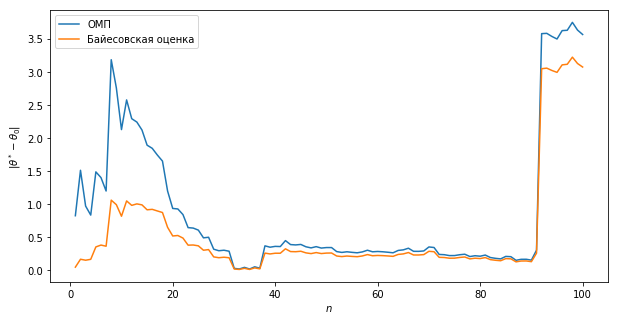

In [5]:
ns = np.arange(1, N + 1)
mle = np.array([np.mean(sample[:n]) for n in ns])
bay_est = np.array([(sigma2 * np.sum(sample[:n]) + a) / (sigma2 * n + 1) for n in ns])
plt.figure(figsize=(10, 5))
plt.plot(ns, np.abs(mle - theta0), label='ОМП')
plt.plot(ns, np.abs(bay_est - theta0), label='Байесовская оценка')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel(r'$|\theta^* - \theta_0|$')
plt.show()

#### 4. Вывод.

Обе оценки довольно сильно отличаются от реального значения параметра, потому что на самом деле, оценивая матожидание, мы имеем дело не с нормальным распределением, а с распределением Коши, у которого, как известно, матожидания нет. Тем не менее, при отстутствии выбросов распределение Коши довольно хорошо приближается нормальным и оценка "матожидания" получается близкой к нулю. При появлении сильных выбросов, однако, график разности оценки и истинного значения параметра резко скачет вверх, что мы и видим на графике. Байесовская оценка в данном случае проявляет себя чуть лучше, поскольку с помощью априорного распределения увеличивается вероятность попадания оценки в 0.5-окрестность нуля, и это немного компенсирует наличие тяжелых хвостов у распределения Коши.